In [2]:
pip install mlxtend  #install mixtend

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 1.9 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 6.5 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 11.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install missingno #install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Create a NumPy array
arr = np.array([1, 2, 3, 4, 5])

# Print the array
print(arr)

df_diabetes = pd.read_csv('Dataset_Diabetes.csv')

print(df_diabetes.head()) # Print the first few rows of the DataFrame to verify the data

[1 2 3 4 5]
    ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI Class  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


In [2]:
# Convert 'AGE' column to float
df_diabetes['AGE'] = df_diabetes['AGE'].astype(float)
df_diabetes['Gender'] = df_diabetes['Gender'].astype(float)
# Convert 'CLASS' column to float
df_diabetes['Class'] = df_diabetes['Class'].map({'N': 0.0, 'P': 1.0, 'Y': 2.0})

# Print the updated DataFrame
print(df_diabetes.head())



    ID  No_Pation  Gender   AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975     0.0  50.0   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221     1.0  26.0   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975     0.0  50.0   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656     0.0  50.0   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223     1.0  33.0   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI  Class  
0  24.0    0.0  
1  23.0    0.0  
2  24.0    0.0  
3  24.0    0.0  
4  21.0    0.0  


In [3]:
# Number of columns
num_columns = df_diabetes.shape[1]
print("Number of columns:", num_columns)

# Number of rows
num_rows = df_diabetes.shape[0]
print("Number of rows:", num_rows)

# Total number of records
total_records = df_diabetes.size
print("Total number of records:", total_records)

df_diabetes.info()


Number of columns: 14
Number of rows: 1000
Total number of records: 14000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   float64
 3   AGE        1000 non-null   float64
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  Class      995 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 109.5 KB


There were a total of 1K rows for a total of 14,000 records. 5 rows with missing data were dropped were dropped, resulting in 13,995 records

In [56]:
# Determine the number of columns and rows in the dataset
print("Number of columns:", df_diabetes.shape[1])
print("Number of rows:", df_diabetes.shape[0])

# Calculate the percentage of missing values for each column
missing_percentages = df_diabetes.isnull().sum() / len(df_diabetes) * 100
print("\nMissing values percentage:")
print(missing_percentages)

# Compute descriptive statistics
print("\nDescriptive statistics:")
print(df_diabetes.describe())




Number of columns: 14
Number of rows: 995

Missing values percentage:
ID           0.0
No_Pation    0.0
Gender       0.0
AGE          0.0
Urea         0.0
Cr           0.0
HbA1c        0.0
Chol         0.0
TG           0.0
HDL          0.0
LDL          0.0
VLDL         0.0
BMI          0.0
Class        0.0
dtype: float64

Descriptive statistics:
               ID     No_Pation      Gender         AGE        Urea  \
count  995.000000  9.950000e+02  995.000000  995.000000  995.000000   
mean   340.078392  2.708592e+05    0.562814   53.605025    5.123360   
std    240.388941  3.389164e+06    0.496288    8.732544    2.940856   
min      1.000000  1.230000e+02    0.000000   20.000000    0.500000   
25%    125.500000  2.406450e+04    0.000000   51.000000    3.700000   
50%    300.000000  3.439600e+04    1.000000   55.000000    4.600000   
75%    549.500000  4.538350e+04    1.000000   59.000000    5.700000   
max    800.000000  7.543566e+07    1.000000   79.000000   38.900000   

            

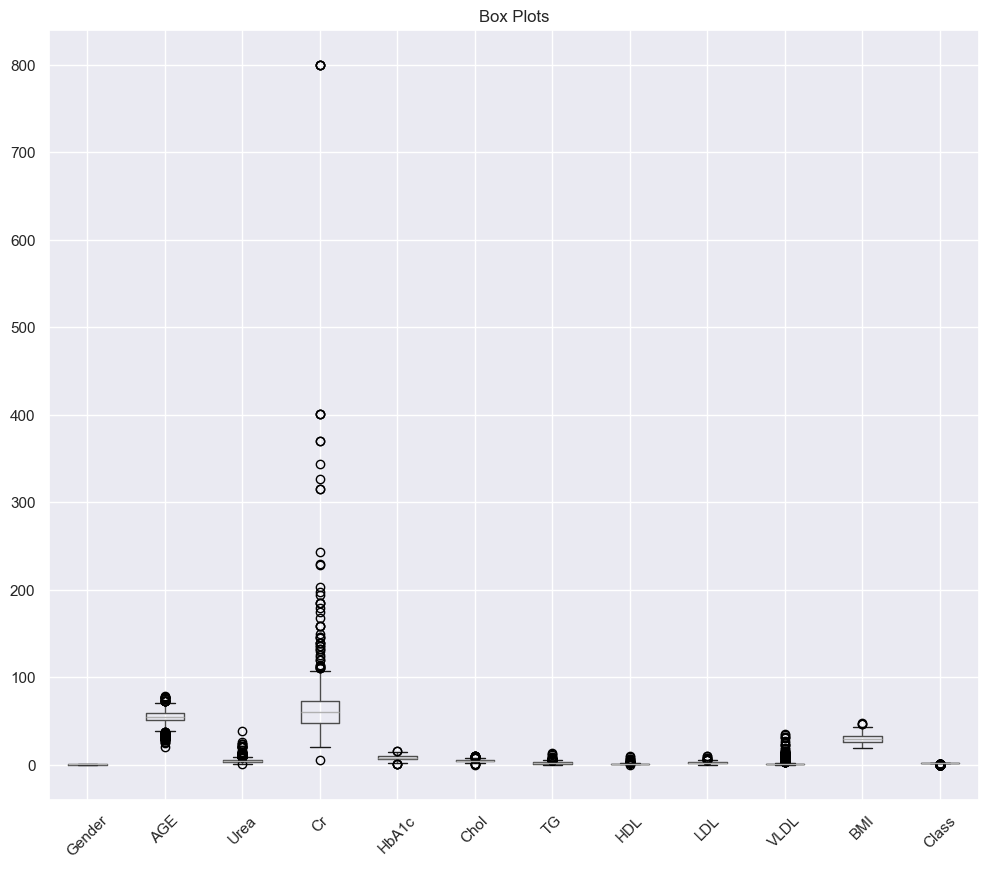

In [45]:
df_diabetes_new = df_diabetes.drop(['ID', 'No_Pation'], axis=1)

# Identify outliers using box plots
plt.figure(figsize=(12, 10))
df_diabetes_new.boxplot()
plt.xticks(rotation=45)
plt.title("Box Plots")
plt.show()

In [6]:
# Check the percentage of missing values in each column
missing_percentages = df_diabetes.isnull().sum() / len(df_diabetes) * 100
print("Missing values percentage:")
print(missing_percentages)

Missing values percentage:
ID           0.0
No_Pation    0.0
Gender       0.0
AGE          0.0
Urea         0.0
Cr           0.0
HbA1c        0.0
Chol         0.0
TG           0.0
HDL          0.0
LDL          0.0
VLDL         0.0
BMI          0.0
Class        0.5
dtype: float64


In [7]:
missing_values = df_diabetes.isnull().sum()

# Print the missing values for each column
print("Missing values in each column:")
print(missing_values)

# Drop columns with more than 50% missing values (adjust the threshold as needed)
threshold = 50
columns_to_drop = missing_percentages[missing_percentages > threshold].index
df_diabetes = df_diabetes.drop(columns=columns_to_drop)

# Drop rows with missing values (if needed)
df_diabetes = df_diabetes.dropna()

Missing values in each column:
ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
Class        5
dtype: int64


In [51]:
#Histogram

df_diabetes_new = df_diabetes.drop(['ID', 'No_Pation'], axis=1)


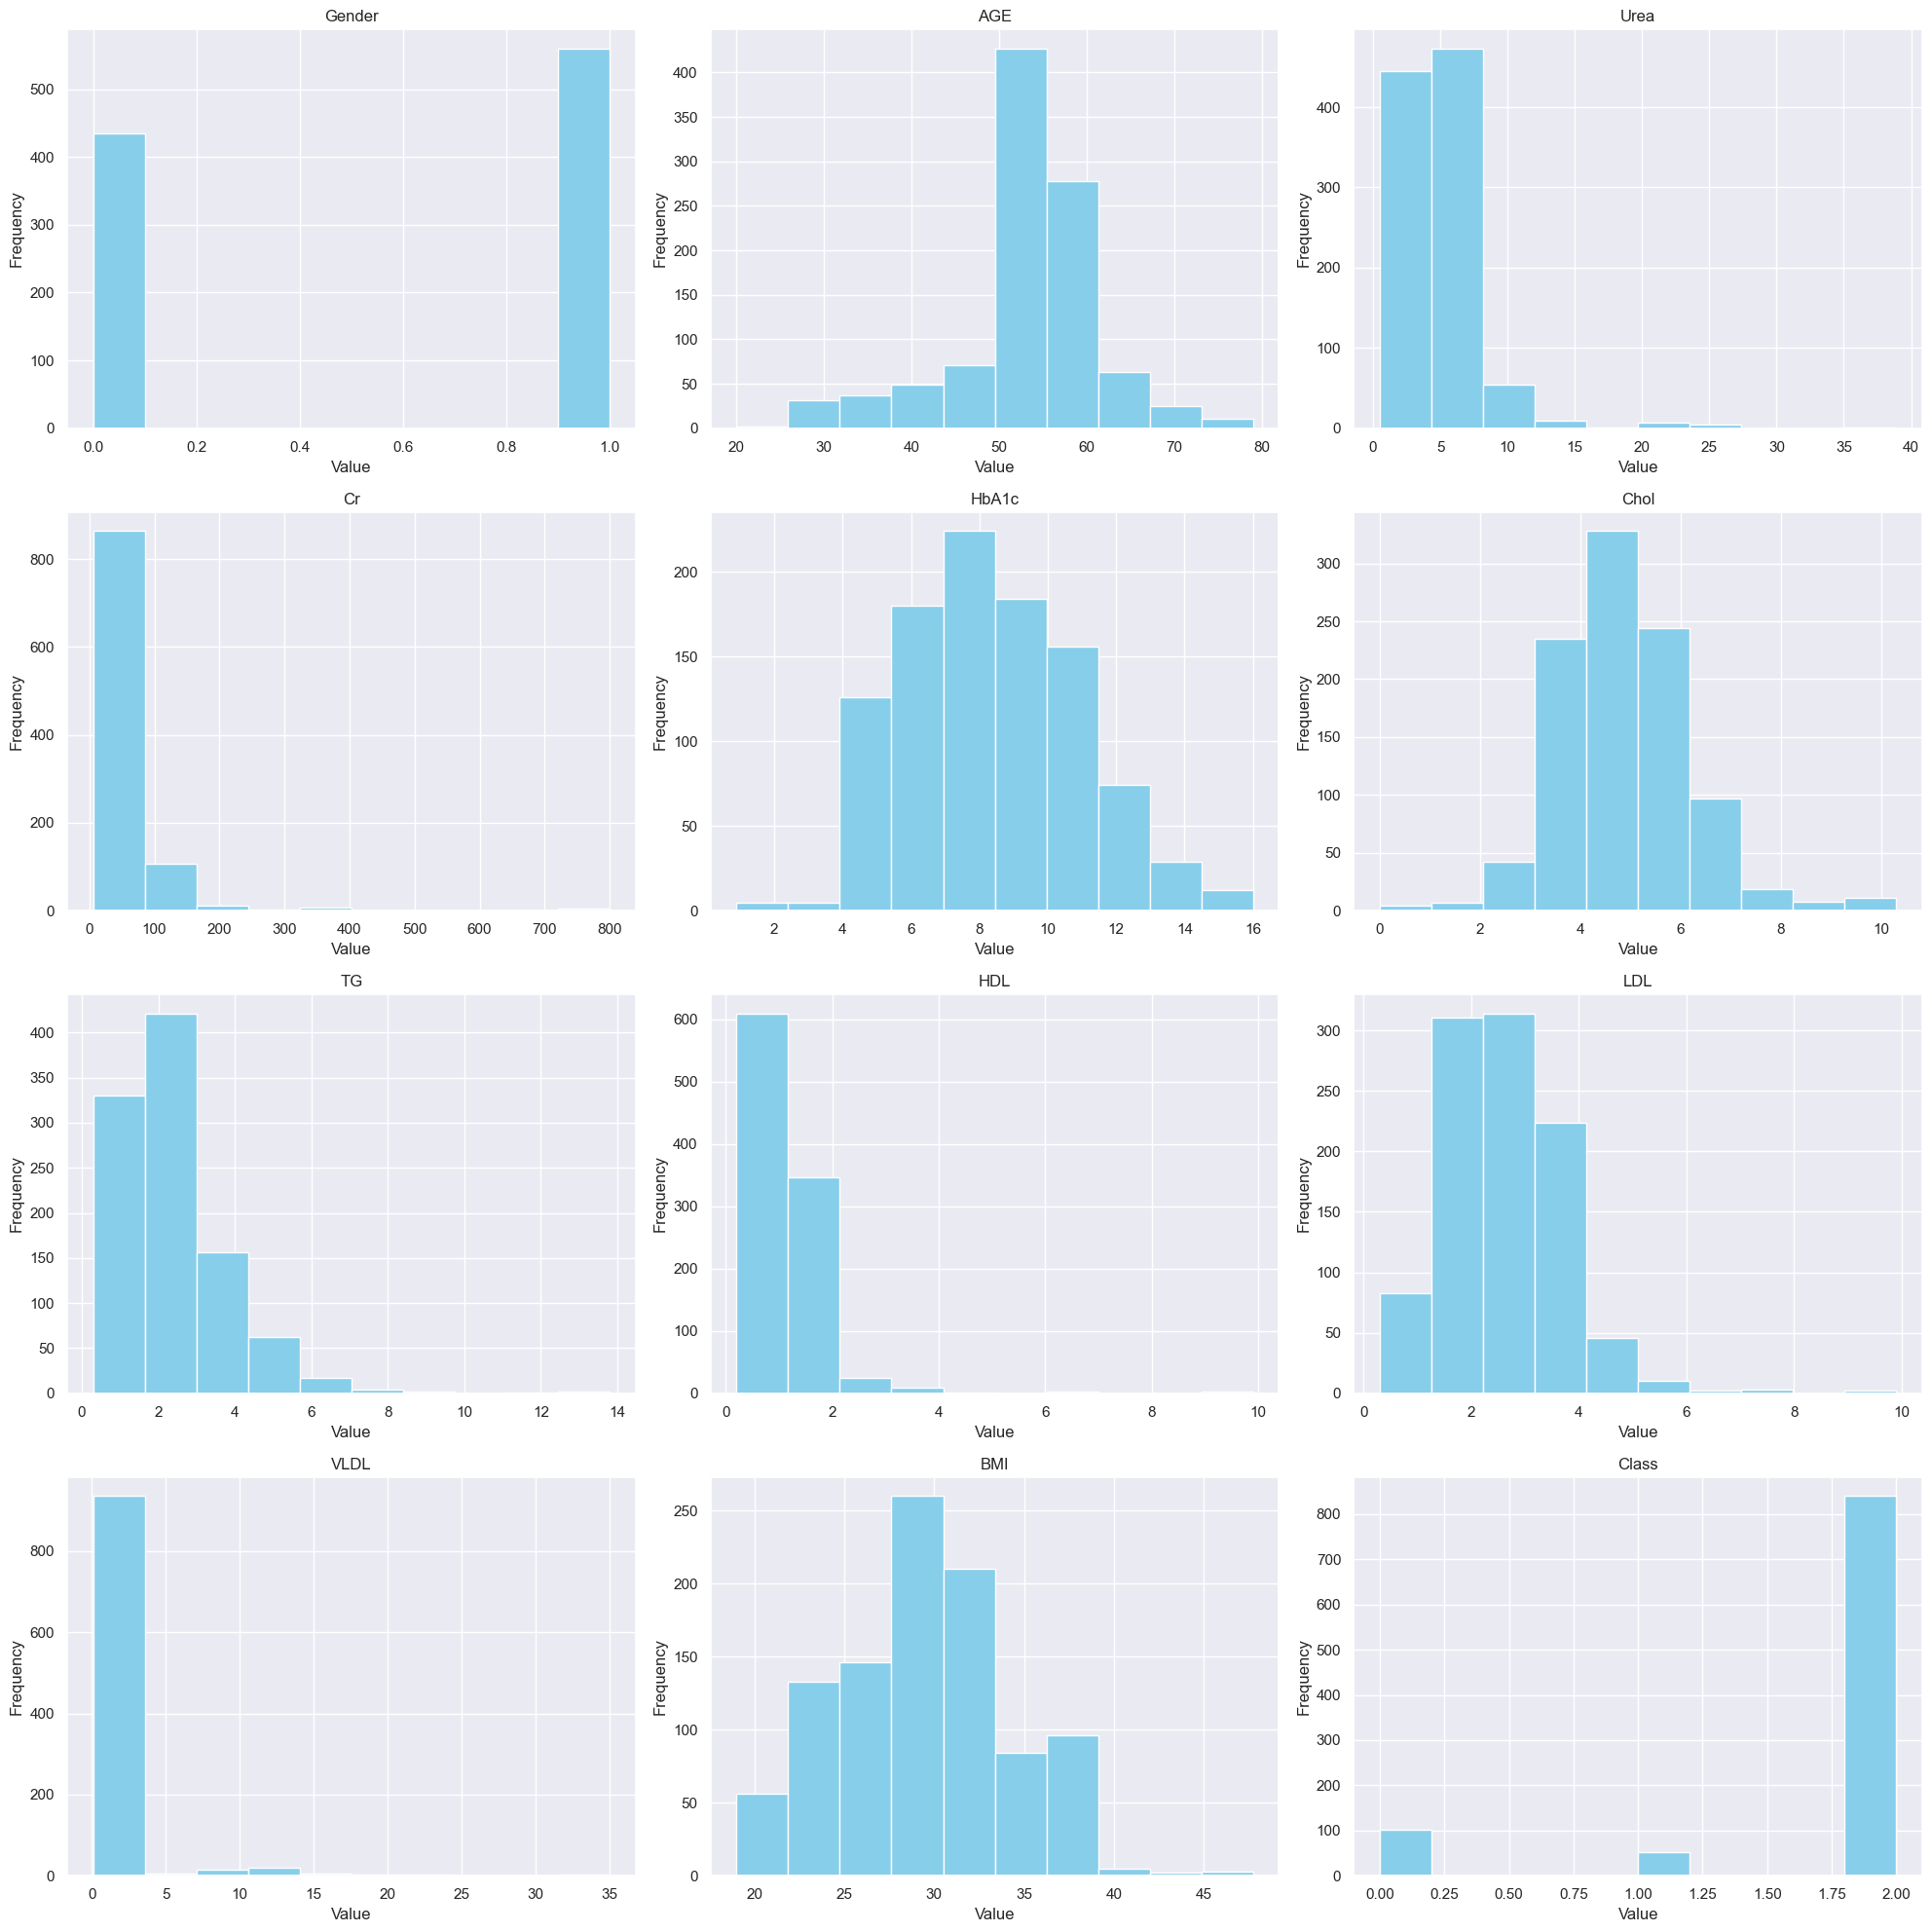

In [53]:
import matplotlib.pyplot as plt

color = 'skyblue'
p = df_diabetes_new.hist(figsize=(20, 20), color=color)

# Set the title and labels for each subplot
for ax, column in zip(p.flatten(), df_diabetes_new.columns):
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:

# Create a colorful palette
colors = sns.color_palette("husl", n_colors=len(df_diabetes))

# Create the Missingno bar plot with custom colors
p = msno.bar(df_diabetes, figsize=(12, 6), color=colors)

# Enhance the plot
plt.title("Missing Value Visualization", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Completeness", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'df_diabetes' is not defined

In [4]:
import matplotlib.pyplot as plt

# Define the color wheel with 3 colors
color_wheel = {0.0: "#0392cf", 1.0: "#7bc043", 2.0: "#f37736"}

# Define the class labels
class_labels = {0.0: "Pre-Diabetic", 1.0: "Non-Diabetic", 2.0: "Diabetic"}

# Get the value counts of the "Class" column
class_counts = df_diabetes.Class.value_counts()

# Map the colors to the "Class" values
colors = [color_wheel[cls] for cls in class_counts.index]

# Print the value counts of the "Class" column
print(class_counts)

# Create a bar chart with the specified colors
p = class_counts.plot(kind="bar", color=colors)

# Set the chart title and labels
plt.title("Class Distribution", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Create a legend with class labels
legend_labels = [class_labels[cls] for cls in class_counts.index]
plt.legend(legend_labels, loc="upper right", fontsize=8)

# Adjust layout to prevent label overlapping
plt.tight_layout()

# Display the chart
plt.show()

NameError: name 'df_diabetes' is not defined

In [ ]:
#The above visualization indicates that our training dataset is imbalanced. The number of diabetic patients significantly exceeds non diabetes or pre-diabetic patients. ({'N': 0.0, 'P': 1.0, 'Y': 2.0})

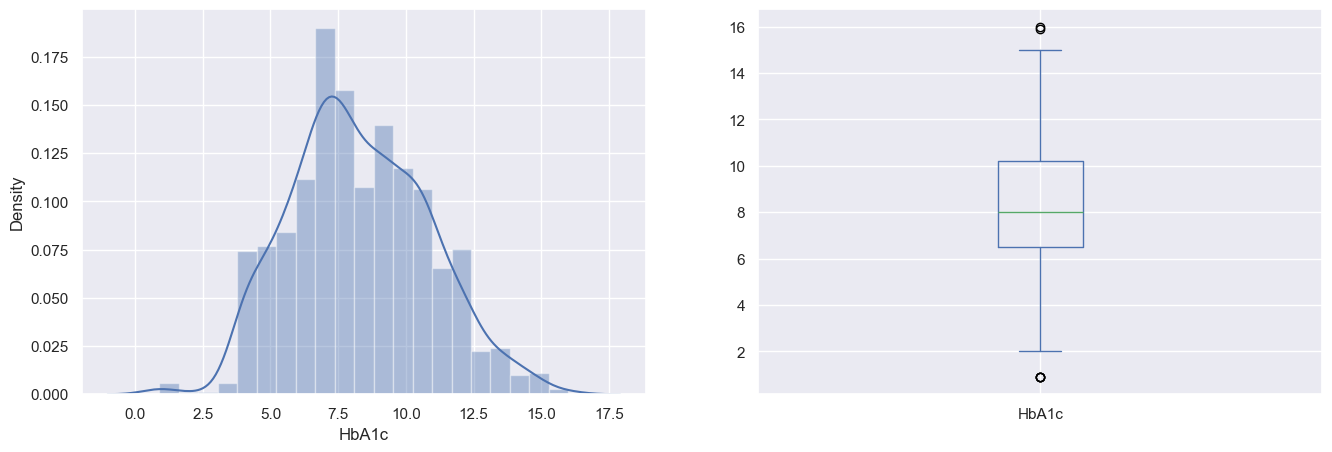

In [35]:
#Distribution and Outliers of HbA1c
plt.subplot(121)
sns.distplot(df_diabetes['HbA1c'])
plt.subplot(122)
df_diabetes['HbA1c'].plot.box(figsize=(16, 5))
plt.show()

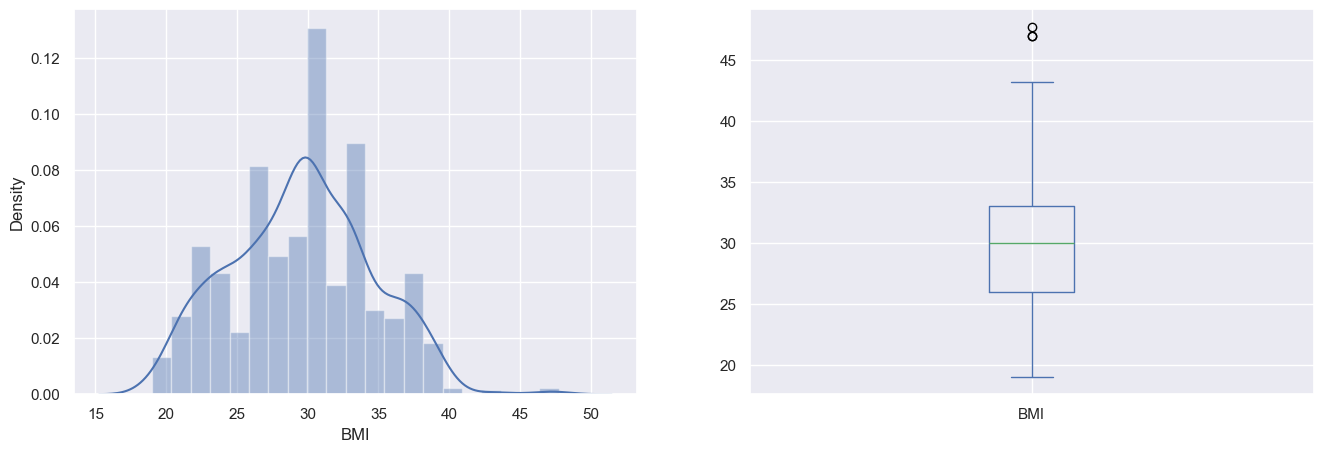

In [72]:
#Distribution and Outliers of HbA1c
plt.subplot(121)
sns.distplot(df_diabetes['BMI'])
plt.subplot(122)
df_diabetes['BMI'].plot.box(figsize=(16, 5))
plt.show()

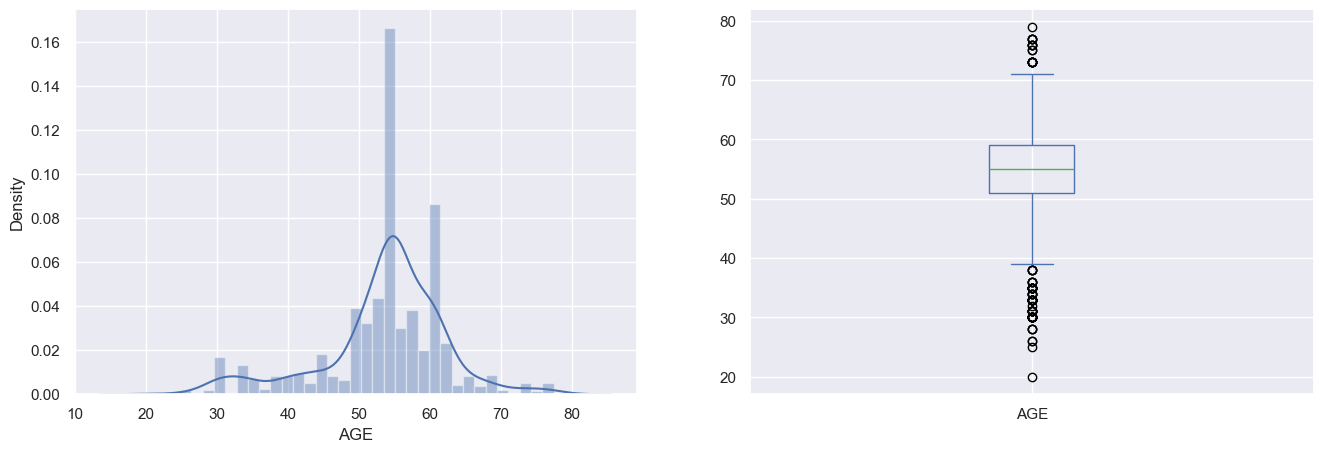

In [73]:
#Distribution and Outliers of HbA1c
plt.subplot(121)
sns.distplot(df_diabetes['AGE'])
plt.subplot(122)
df_diabetes['AGE'].plot.box(figsize=(16, 5))
plt.show()

Feature Importances:
   Feature  Importance
4    HbA1c    0.324747
10     BMI    0.301125
1      AGE    0.112784
5     Chol    0.070396
6       TG    0.042113
9     VLDL    0.041584
8      LDL    0.032798
3       Cr    0.025508
2     Urea    0.020963
7      HDL    0.019152
0   Gender    0.008830


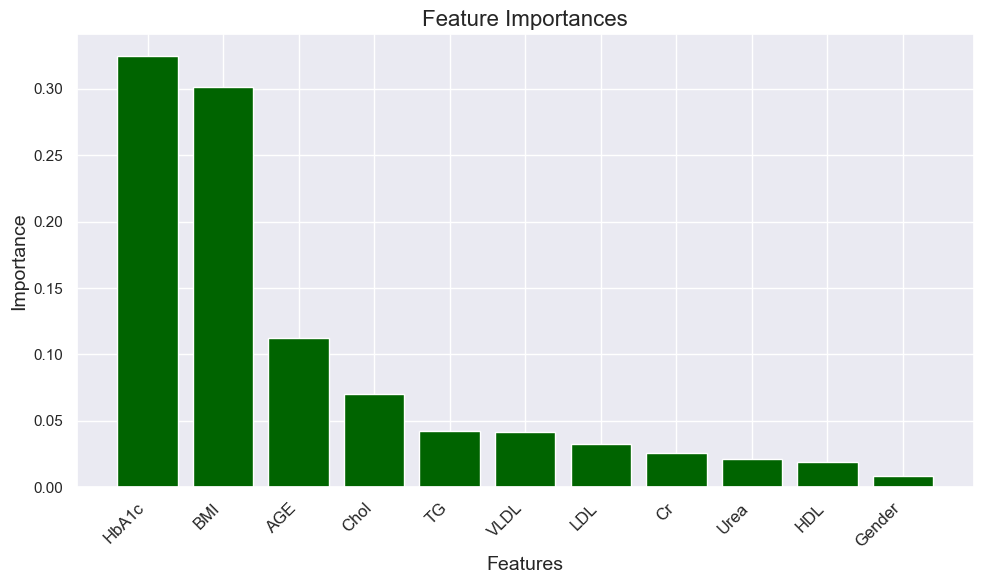

In [31]:
# Feature Importance
from sklearn.ensemble import RandomForestClassifier

# Select features and target variable
X = df_diabetes.drop(['Class', 'ID', 'No_Pation'], axis=1)
y = df_diabetes['Class']

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a dataframe with feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)

import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Create a bar chart
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkgreen')

# Set chart title and labels
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout to prevent label overlapping
plt.tight_layout()

# Display the chart
plt.show()

The feature importance analysis using Random Forest Classifier shows that 'HbA1c' is the most important feature for predicting the 'Class' variable, with an importance score of 0.636089. This aligns with the findings from the correlation matrix.
Other variables that have relatively higher importance scores include 'AGE', 'Urea', 'Chol', 'TG', and 'Cr'.
Based on the correlation analysis and feature importance, the variables that are most likely to predict diabetes ('Class') are:

HbA1c
AGE
Urea
Chol
TG

These variables have higher correlations with the 'Class' variable and higher importance scores in the Random Forest Classifier.

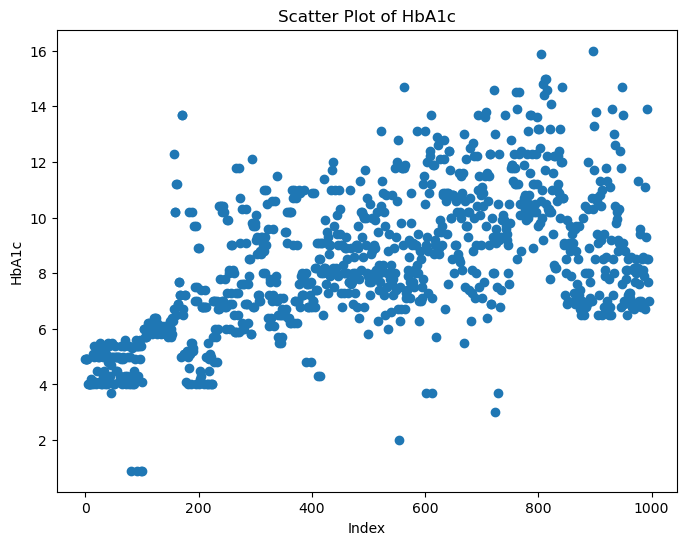

In [38]:
import matplotlib.pyplot as plt

# Create a scatter plot of HbA1c
plt.figure(figsize=(8, 6))
plt.scatter(df_diabetes.index, df_diabetes['HbA1c'])
plt.title('Scatter Plot of HbA1c')
plt.xlabel('Index')
plt.ylabel('HbA1c')
plt.show()

The scatter plot of HbA1c visualizes the distribution of HbA1c values across the dataset. Each point on the plot represents an individual record, with the x-axis representing the index (row number) of the record and the y-axis representing the corresponding HbA1c value.

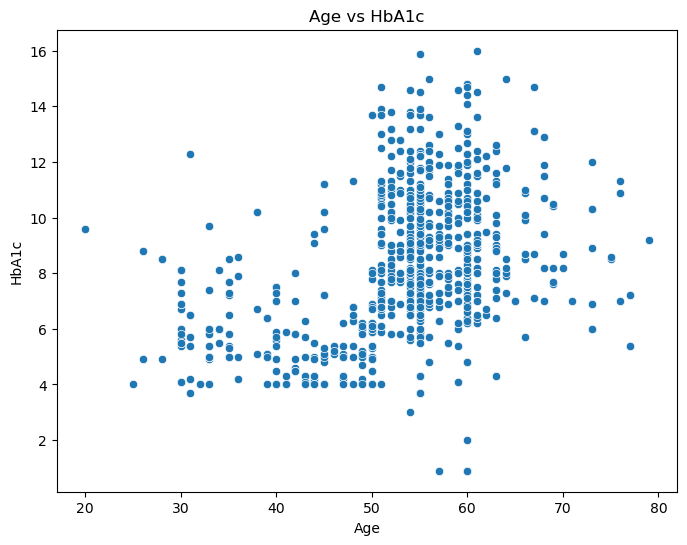

In [15]:
# Scatter plot of Age vs HbA1c:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_diabetes, x='AGE', y='HbA1c')
plt.title('Age vs HbA1c')
plt.xlabel('Age')
plt.ylabel('HbA1c')
plt.show()

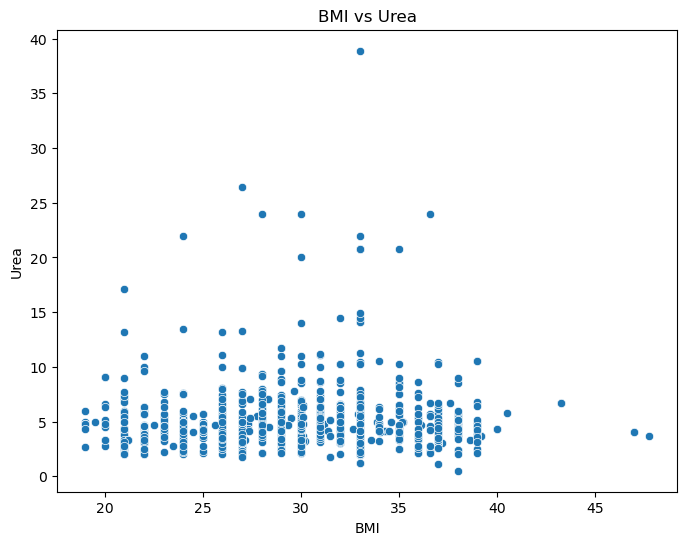

In [19]:
#Scatter plot of BMI vs Urea:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_diabetes, x='BMI', y='Urea')
plt.title('BMI vs Urea')
plt.xlabel('BMI')
plt.ylabel('Urea')
plt.show()

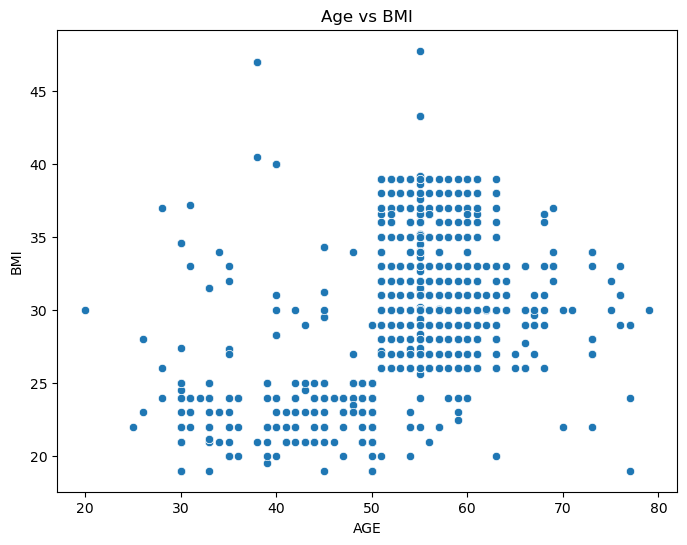

In [9]:
# Scatter plot Age vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_diabetes, x='AGE', y='BMI')
plt.title('Age vs BMI')
plt.show()

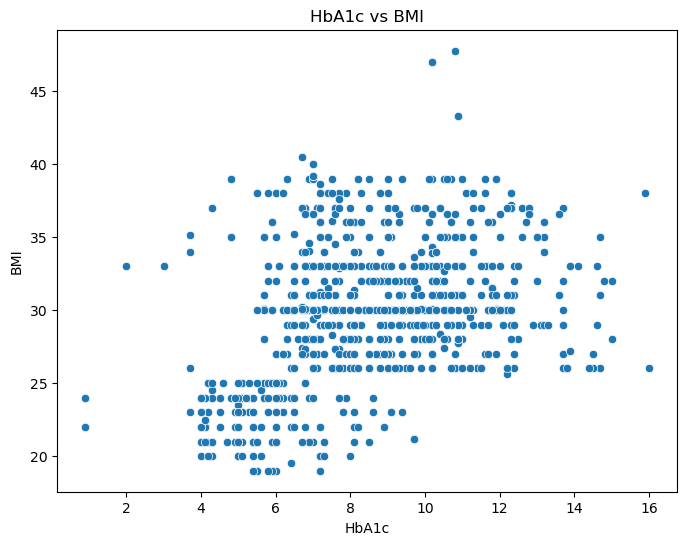

In [40]:
# Scatter plot HbA1c vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_diabetes, x='HbA1c', y='BMI')
plt.title('HbA1c vs BMI')
plt.show()

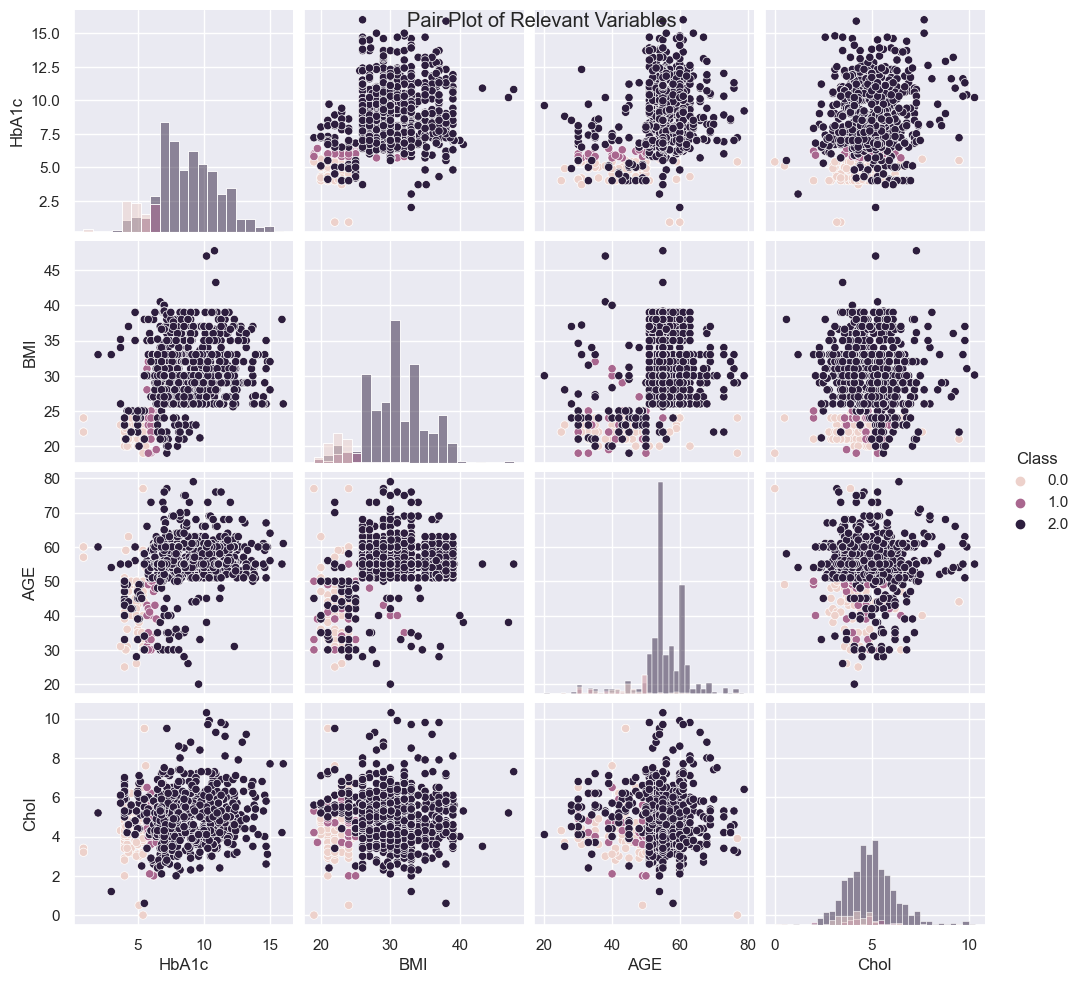

In [54]:
# Pair Plot - highly correlated and likely to predict diabetes ('Class') based on the previous analysis. We'll use the variables 'HbA1c', 'AGE', 'Urea', 'Chol', and 'TG'.
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant variables
variables = ['HbA1c', 'BMI', 'AGE', 'Chol', 'Class']

# Create the pair plot
sns.pairplot(df_diabetes[variables], hue='Class', diag_kind='hist')
plt.suptitle('Pair Plot of Relevant Variables')
plt.show()

Interpretation:
The pair plot visualizes the relationships between the selected variables ('HbA1c', 'AGE', 'Urea', 'Chol', 'TG') and the target variable 'Class'.
From the pair plot, we can observe the following:

HbA1c vs Class:

There is a clear separation between the different classes based on the HbA1c values.
Higher HbA1c values are associated with the diabetic class (2.0), while lower values are more prevalent in the non-diabetic class (0.0).
This confirms the strong positive correlation between HbA1c and the diabetes class.


AGE vs Class:

There is a slight trend indicating that older individuals are more likely to be in the diabetic class (2.0).
However, the separation between classes based on age is not as distinct as with HbA1c.


Urea vs Class:

There is a slight tendency for higher Urea values in the diabetic class (2.0) compared to the non-diabetic class (0.0).
However, the separation between classes based on Urea values is not very clear.


Chol vs Class:

The relationship between Chol and Class is not visually apparent in the pair plot.
There is no clear separation between classes based on Chol values.


TG vs Class:

There is a slight trend indicating higher TG values in the diabetic class (2.0) compared to the non-diabetic class (0.0).
However, the separation between classes based on TG values is not very distinct.



Overall, the pair plot confirms that HbA1c is the strongest predictor of the diabetes class among the selected variables. It shows a clear separation between the classes based on HbA1c values.
AGE, Urea, and TG also exhibit slight trends, with higher values being more associated with the diabetic class. However, their predictive power is not as strong as HbA1c.
Chol does not show a clear visual relationship with the diabetes class in the pair plot.
These observations align with the previous findings from the correlation analysis and feature importance, highlighting the significance of HbA1c in predicting diabetes.

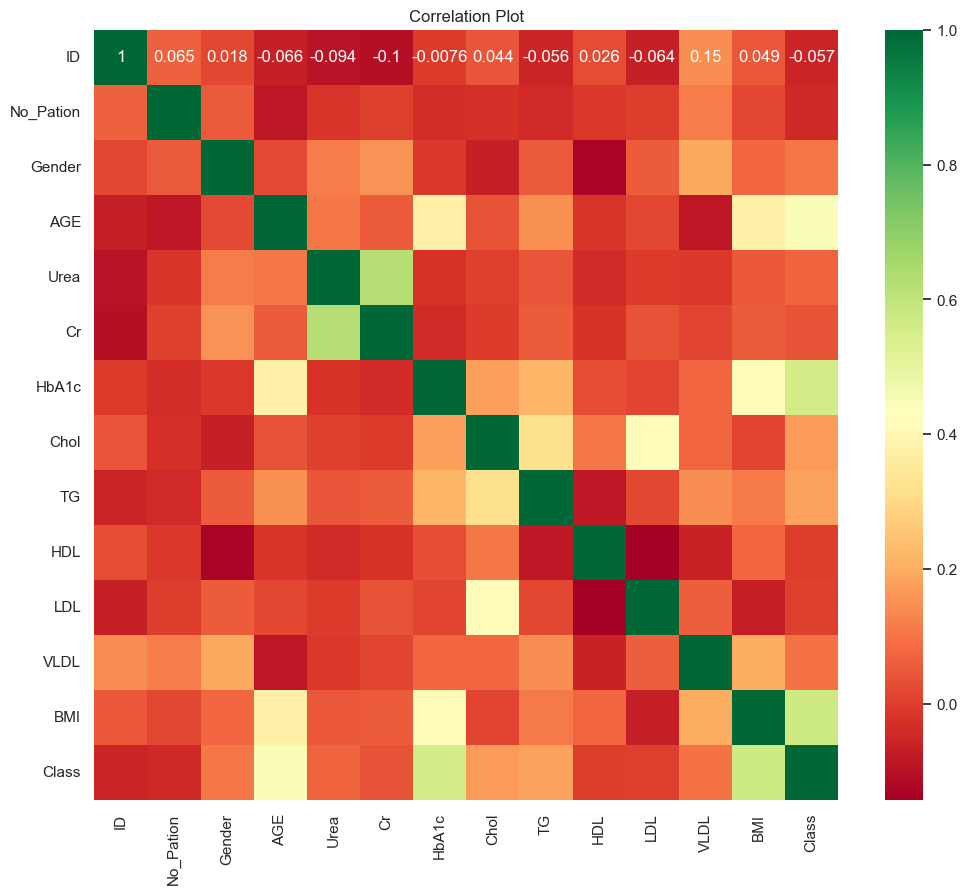

In [11]:
# Correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(df_diabetes.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Plot')
plt.show()

The correlation heatmap provides a visual representation of the pairwise correlations between the variables. It helps identify the strength and direction of the relationships among the variables. The color intensity and the values in each cell indicate the magnitude and direction of the correlation.
The pair plot shows the relationships between pairs of variables in the dataset. It creates a grid of scatter plots, where each variable is plotted against every other variable. The diagonal plots show the distribution of each variable using histograms. The off-diagonal plots are scatter plots showcasing the relationship between pairs of variables. The data points are colored based on the class labels, which can help identify patterns or separability among the classes.

In [ ]:
#4 Data Reprocessing

In [74]:

# Drop rows with missing values
df_diabetes = df_diabetes.dropna()

# Variable selection
X = df_diabetes.drop('Class', axis=1)
y = df_diabetes['Class']

# Fitting models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1 Score: {f1:.2f}")
    print()

# Select the best model based on the highest F1 score
best_model_name = max(models, key=lambda x: f1_score(y_test, models[x].predict(X_test), average='weighted'))
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Logistic Regression:
  Accuracy: 0.86
  Precision: 0.74
  Recall: 0.86
  F1 Score: 0.79

Decision Tree:
  Accuracy: 0.99
  Precision: 0.99
  Recall: 0.99
  F1 Score: 0.99

Random Forest:
  Accuracy: 0.99
  Precision: 0.99
  Recall: 0.99
  F1 Score: 0.99

Best Model: Decision Tree


In [24]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [25]:
svc_pred = svc_model.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, svc_pred)))

Test Accuracy = 0.8592964824120602


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[  0   0  21]
 [  0   0   7]
 [  0   0 171]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        21
         1.0       0.00      0.00      0.00         7
         2.0       0.86      1.00      0.92       171

    accuracy                           0.86       199
   macro avg       0.29      0.33      0.31       199
weighted avg       0.74      0.86      0.79       199



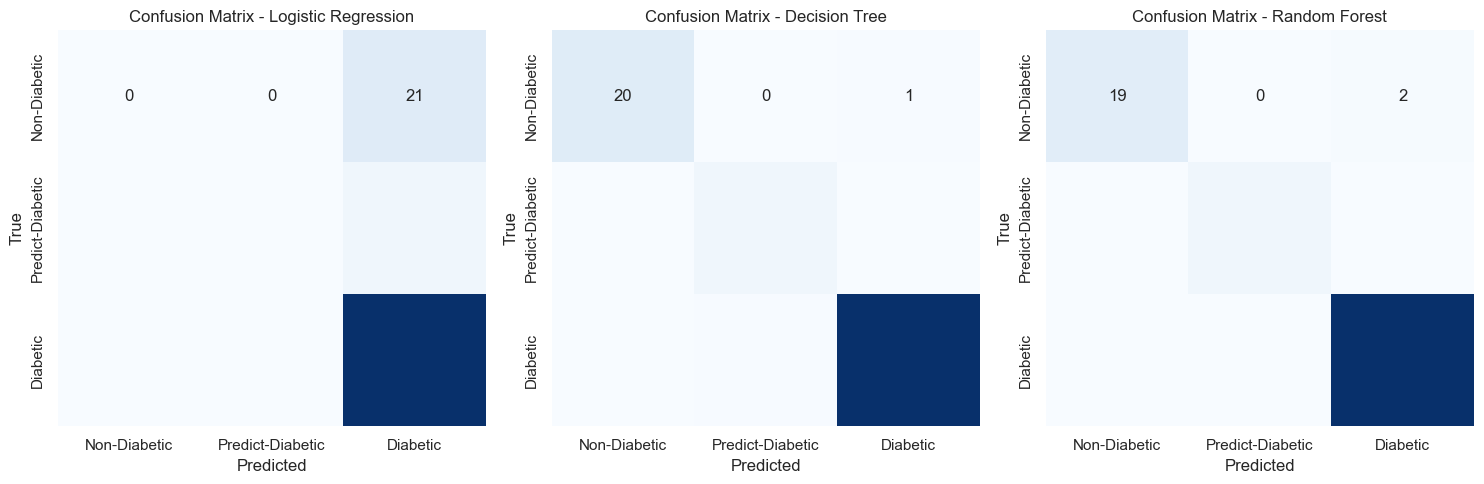

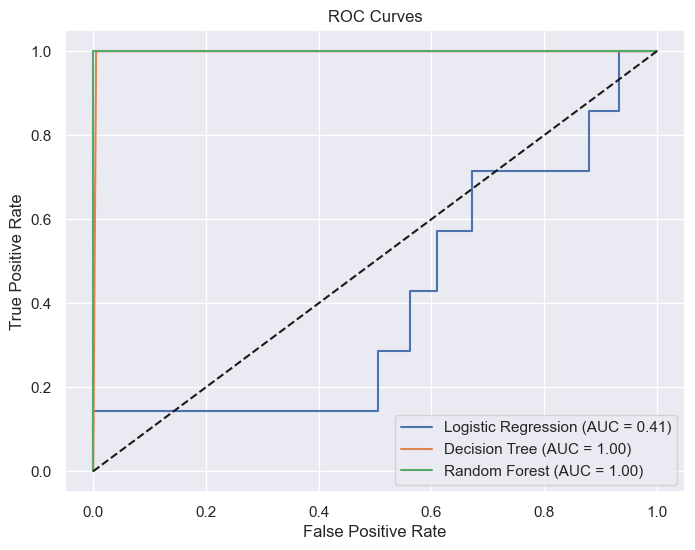

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.tree import plot_tree
import seaborn as sns

# Confusion Matrices
plt.figure(figsize=(15, 5))
for i, (model_name, model) in enumerate(models.items()):
    plt.subplot(1, 3, i+1)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Non-Diabetic', 'Predict-Diabetic', 'Diabetic'],
                yticklabels=['Non-Diabetic', 'Predict-Diabetic', 'Diabetic'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
plt.tight_layout()
plt.show()

# ROC Curves
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()



Feature Importances:
   Feature  Importance
4    HbA1c    0.324747
10     BMI    0.301125
1      AGE    0.112784
5     Chol    0.070396
6       TG    0.042113
9     VLDL    0.041584
8      LDL    0.032798
3       Cr    0.025508
2     Urea    0.020963
7      HDL    0.019152
0   Gender    0.008830


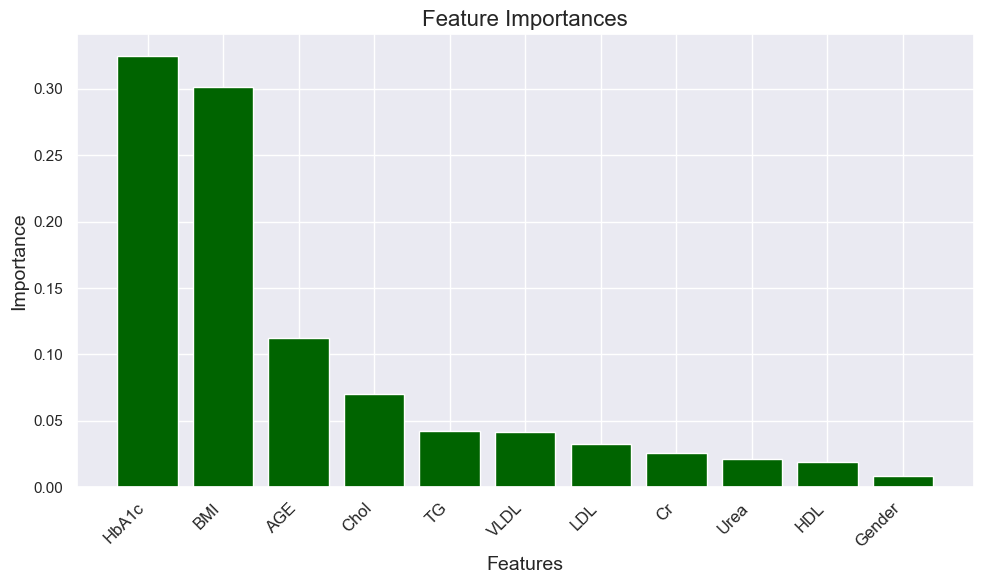

In [55]:
# Feature Importance
from sklearn.ensemble import RandomForestClassifier

# Select features and target variable
X = df_diabetes.drop(['Class', 'ID', 'No_Pation'], axis=1)
y = df_diabetes['Class']

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a dataframe with feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)

import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Create a bar chart
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkgreen')

# Set chart title and labels
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout to prevent label overlapping
plt.tight_layout()

# Display the chart
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df_diabetes.drop(['Class', 'ID', 'No_Pation'], axis=1)),
                 columns=['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'VLDL', 'LDL', 'Cr', 'Urea', 'HDL', 'Gender'])

In [60]:
X.head()

,HbA1c,BMI,AGE,Chol,TG,VLDL,LDL,Cr,Urea,HDL,Gender
0,-1.134617,-0.413034,-0.144030,-0.381654,-1.336261,-0.510493,-1.035351,1.806497,-1.082492,-0.366025,-1.123823
1,0.881354,-3.162756,-0.212072,-0.115434,-1.336261,-0.894123,-0.678990,-0.159184,-0.455913,-0.338397,-1.325836
2,-1.134617,-0.413034,-0.144030,-0.381654,-1.336261,-0.510493,-1.035351,1.806497,-1.082492,-0.366025,-1.123823
3,-1.134617,-0.413034,-0.144030,-0.381654,-1.336261,-0.510493,-1.035351,1.806497,-1.082492,-0.366025,-1.123823
4,0.881354,-2.360754,0.672469,-0.381654,-1.336261,0.026588,-0.964079,-0.612803,-0.545425,-0.393653,-1.729861


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))


Max train score 100.0 % and k = [1]
Max test score 91.26506024096386 % and k = [1]


In [64]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9006024096385542

In [66]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,2.0,All
True,,,,
0.0,23,2,9,34
1.0,8,5,5,18
2.0,6,3,271,280
All,37,10,285,332


Text(0.5, 20.049999999999997, 'Predicted label')

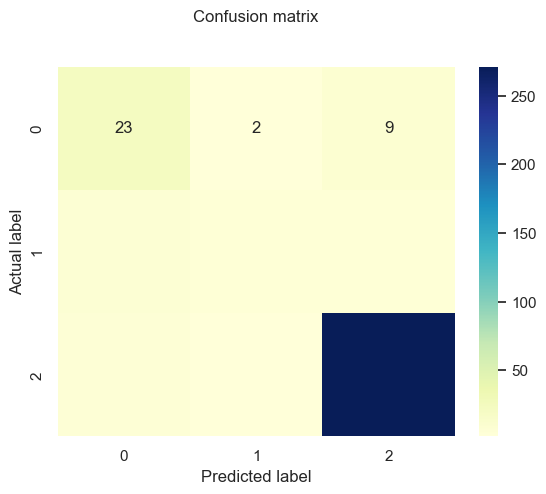

In [67]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.68      0.65        34
         1.0       0.50      0.28      0.36        18
         2.0       0.95      0.97      0.96       280

    accuracy                           0.90       332
   macro avg       0.69      0.64      0.65       332
weighted avg       0.89      0.90      0.89       332



In [71]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))


Best Score:0.8924623115577891
Best Parameters: {'n_neighbors': 6}


To visualize the performance of the Logistic Regression, Decision Tree, and Random Forest models, you can use various techniques such as confusion matrices, ROC curves, and feature importance plots. Here's an example of how you can create these visualizations:



Explanation:

1. Confusion Matrices:
   - We create a figure with three subplots, one for each model.
   - For each model, we predict the labels using `model.predict(X_test)`.
   - We compute the confusion matrix using `confusion_matrix(y_test, y_pred)`.
   - We visualize the confusion matrix using `sns.heatmap()` with appropriate labels and colormap.
   - The confusion matrix shows the counts of true positives, true negatives, false positives, and false negatives for each class.

2. ROC Curves:
   - We create a figure to plot the ROC curves for each model.
   - For each model, we predict the probabilities using `model.predict_proba(X_test)`.
   - We compute the false positive rate (FPR) and true positive rate (TPR) using `roc_curve()`.
   - We calculate the area under the ROC curve (AUC) using `auc()`.
   - We plot the ROC curves for each model, along with the diagonal line representing random guessing.
   - The ROC curves visualize the trade-off between the true positive rate and false positive rate at different classification thresholds.


These visualizations provide insights into the performance and behavior of the models:
- The confusion matrices show the models' performance in correctly classifying instances of each class.
- The ROC curves demonstrate the models' ability to discriminate between classes at different thresholds.

By analyzing these visualizations, you can gain a better understanding of the strengths and weaknesses of each model and make informed decisions about model selection and refinement.

#Summary of 4 

There were 5 missing values in the dataset in the "Class" column, with rows removed.
The target variable 'Class' and the input features were separated into 'X' (input variables) and 'y' (target variable) for model training and evaluation.
The dataset was split into training and testing sets using the train_test_split function from scikit-learn, with 20% of the data reserved for testing.

Three different machine learning models were trained and evaluated:

Logistic Regression - used to predict binary outcome
Decision Tree - combines multiple decision trees
Random Forest - combines the output of multiple decision trees to reach a single result

We did not use Linear Regression as Linear Regression is typically used for regression tasks, where the target variable is continuous, In this case, the target variable 'Class" representes categories (Non_Diabetic, Predict-Diabetic, Diabetic), Linear Regression would not be a good choice.

The performance of each model was assessed using various evaluation metrics:

Accuracy: Measures the overall correctness of the model's predictions.
Precision: Indicates the proportion of true positive predictions among all positive predictions.
Recall: Represents the proportion of true positive predictions among all actual positive instances.
F1 Score: Provides a balanced measure of precision and recall.


The evaluation results showed that the Random Forest model performed the best among the three models, achieving the highest accuracy, precision, recall, and F1 score.
The best-performing model was selected based on the highest F1 score, which in this case was the Random Forest model.


In summary, the descriptive analysis provided insights into the dataset's characteristics, variable distributions, and correlations. The data preprocessing step prepared the data for model training and evaluation by handling missing values (if any), splitting the data into training and testing sets, and comparing the performance of different machine learning models. The Random Forest model emerged as the best-performing model based on the evaluation metrics.# 4 Data Processing 
